In [ ]:
"""
Feature Engineering and Classification of Airbnb Listings Using Real-World Data

This project applies feature engineering techniques to the New York City Airbnb Open Data (2019) dataset 
to transform raw numerical, categorical, and date features into a model-ready format. 
The objective is to demonstrate how thoughtful feature transformations improve the performance and 
interpretability of a classification model that predicts whether an Airbnb listing belongs to a high-price or low-price category.
"""

In [185]:
# TASK 1 - Data Loading and Initial Inspection

In [186]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler  # Importing scaler for standardizing numerical features
from sklearn.feature_selection import mutual_info_classif # Used to measure non-linear dependency between features and target
from sklearn.model_selection import train_test_split # Used to split data into training, validation, and test sets
from sklearn.linear_model import LogisticRegression # Importing Logistic Regression model
from sklearn.metrics import classification_report, roc_auc_score # Used to assess precision, recall, F1-score, and ROC-AUC
from sklearn.metrics import confusion_matrix # Importing confusion matrix for model evaluation
import matplotlib.pyplot as plt # For plotting graphs and visualizations
import seaborn as sns # For creating nicer statistical plots

#Loading the CSV
df = pd.read_csv("AB_NYC_2019.csv") 

df_original = df.copy()

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [187]:
#Shape of the dataset
df. shape 

(48895, 16)

In [188]:
#Data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [189]:
#Check missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [190]:
# Check duplicate rows
df.duplicated().sum() # counts total duplicate rows

np.int64(0)

In [191]:
# Displays summary statistics of numerical features to identify scale, spread, and potential outliers
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
"""

The dataset was loaded and initially explored to understand its structure, size, and feature types. 
It consists of 48,895 rows and 16 columns, containing a mix of numerical, categorical, and date features. 
An initial inspection revealed missing values primarily in the last_review and reviews_per_month columns, 
while other features were largely complete.

This step helped identify which columns are suitable for feature engineering, which require cleaning or transformation, 
and which may be removed due to irrelevance or noise. 
Understanding the dataset at this stage ensures informed and effective feature engineering decisions in subsequent steps.

"""

In [193]:
# TASK 2 - Target Variable Creation and Initial Feature Pruning

In [194]:
median_price = df["price"].median() # Calculate median price
df["high_price"] = (df["price"] >= median_price).astype(int) # Create binary target: 1 = high price, 0 = low price

In [195]:
df.drop(columns=["price"], inplace=True) # Prevent model from directly learning the target variable

In [196]:
df.drop(columns=["id", "host_id", "name", "host_name"], inplace=True) #Removing Irrelevant and Noisy Features

In [ ]:
"""

The price variable was transformed into a binary target using the median value to enable classification and reduce 
the influence of extreme outliers. 

Identifier and free-text columns were removed to minimize noise and prevent data leakage, ensuring that only meaningful 
and generalizable features are retained for modeling.

After this step:
- The dataset has a well-defined classification target
- Irrelevant and leakage-prone columns are removed
- Remaining features are suitable for feature engineering

"""

In [198]:
# TASK 3 - Handling Missing Values

In [199]:
# Handling reviews_per_month
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)  # Replacing missing values with 0

In [200]:
# Handling last_review
df["last_review"] = pd.to_datetime(df["last_review"]) #Convert to datetime; Missing values will be handled during feature creation

In [ ]:
"""

Missing values in reviews_per_month were replaced with zero, as the absence of reviews implies no review activity. 

The last_review feature was converted to a datetime format to enable time-based feature engineering in later steps, 
preserving useful temporal information instead of discarding the column.

"""

In [202]:
# TASK 4 - Encoding Categorical Features

In [203]:
categorical_cols = ["neighbourhood_group", "neighbourhood", "room_type"] # List of categorical features to be encoded

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # Apply one-hot encoding

In [204]:
df.shape

(48895, 235)

In [ ]:
"""

Categorical features were encoded using one-hot encoding because they represent nominal categories without an inherent order.
  
This transformation allows machine learning models to process categorical information numerically while avoiding misleading 
ordinal relationships.
  
After one-hot encoding, the number of features increased significantly, reflecting the transformation of categorical variables 
into a machine-learning–compatible numerical format.

"""

In [206]:
# TASK 5 - Scaling Numerical Features

In [207]:
numerical_cols = [
    "latitude",
    "longitude",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365"
] # Numerical columns requiring scaling for model compatibility

In [208]:
# Apply Standard Scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
"""

Numerical features were scaled using standardization to ensure they have comparable ranges. 
This is particularly important for distance-based and linear models, 
where unscaled features with large magnitudes can dominate the learning process.

"""

In [210]:
# TASK 6 - Creating Derived Features

In [211]:
# Feature: Days Since Last Review

latest_date = df["last_review"].max() # Find the most recent review date in the dataset

df["days_since_last_review"] = (latest_date - df["last_review"]).dt.days  # Compute recency of last review in days

df["days_since_last_review"] = df["days_since_last_review"].fillna(
    df["days_since_last_review"].max()
)  # Replace missing values with maximum recency (no recent reviews)

In [212]:
# Feature: Reviews per Night

df["reviews_per_night"] = df["number_of_reviews"] / (df["minimum_nights"] + 1) # Creating ratio feature to capture review intensity per stay length


In [213]:
# Feature: High Availability Flag

df["high_availability"] = (df["availability_365"] > 180).astype(int) # High availability indicator

In [214]:
df.drop(columns=["last_review"], inplace=True)

In [ ]:
"""

Derived features were created to capture temporal recency, normalized activity levels, and simplified availability signals. 
These transformations help models learn more meaningful patterns compared to raw features alone and improve generalization.

"""

In [216]:
# TASK 7 - Feature Selection

In [217]:
# Correlation-Based Feature Selection

correlation = df.corr()["high_price"].abs().sort_values(ascending=False) # Compute absolute correlation of features with target
correlation.head(10)  # Top correlated features

high_price                        1.000000
room_type_Private room            0.604452
neighbourhood_group_Manhattan     0.303016
longitude                         0.296184
neighbourhood_group_Queens        0.169224
neighbourhood_group_Brooklyn      0.160718
neighbourhood_Midtown             0.138235
neighbourhood_Bushwick            0.136104
room_type_Shared room             0.122895
calculated_host_listings_count    0.121356
Name: high_price, dtype: float64

In [ ]:
"""
Correlation analysis revealed that room type and location-based features have the strongest relationship with the price category. 
In particular, private and shared room indicators and Manhattan-based listings showed high correlation values, 
highlighting the importance of accommodation type and geographic location in Airbnb pricing.
"""

In [219]:
# Mutual Information

X = df.drop(columns=["high_price"]) # Input features 
y = df["high_price"] # Target variable

mi_scores = mutual_info_classif(X, y, random_state=42) # Compute mutual information scores for non-linear feature relevance

mi_df = pd.DataFrame({
    "feature": X.columns,
    "mi_score": mi_scores
}).sort_values(by="mi_score", ascending=False) # Rank features by importance

mi_df.head(10)

,feature,mi_score
231,room_type_Private room,0.199262
1,longitude,0.086097
0,latitude,0.059635
8,neighbourhood_group_Manhattan,0.049561
5,calculated_host_listings_count,0.041839
2,minimum_nights,0.019595
234,reviews_per_night,0.019191
7,neighbourhood_group_Brooklyn,0.015928
9,neighbourhood_group_Queens,0.013306
137,neighbourhood_Midtown,0.011318


In [220]:
# Select top features based on Mutual Information
top_features = mi_df[mi_df["mi_score"] > 0.01]["feature"].tolist()

# Create feature-selected dataset
df_selected = df[top_features + ["high_price"]]

In [ ]:
"""

Mutual Information analysis revealed that room type and location-based features have the strongest dependency with the price category. 
Additionally, engineered features such as reviews per night appeared among the top-ranked features, validating the effectiveness of 
feature engineering beyond raw attributes.

"""

In [222]:
# TASK 8 - Model Training and Testing

In [223]:
X = df_selected.drop(columns=["high_price"])
y = df_selected["high_price"]

# First split: training set and temporary set
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, # Split data into training (70%) and temporary (30%) sets with preserved class balance
    random_state=42, #This controls randomness; Locking the shuffle order.
    stratify=y #Ensures the ratio stays the same in splits
)

# Split temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp # Validation (15%) and Test (15%)
)

In [224]:
baseline_model = LogisticRegression(max_iter=1000) # Initializing logistic regression as baseline classification model
baseline_model.fit(X_train, y_train) # Training the model on training data

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [225]:
y_val_pred_base = baseline_model.predict(X_val) # Generate class predictions on validation data
y_val_prob_base = baseline_model.predict_proba(X_val)[:, 1] # Predict probabilities for the positive class

print(classification_report(y_val, y_val_pred_base)) # Display precision, recall, F1-score, and support
print("Validation ROC-AUC:", roc_auc_score(y_val, y_val_prob_base)) # Display precision, recall, F1-score, and support


              precision    recall  f1-score   support

           0       0.81      0.78      0.79      3665
           1       0.79      0.82      0.80      3669

    accuracy                           0.80      7334
   macro avg       0.80      0.80      0.80      7334
weighted avg       0.80      0.80      0.80      7334

Validation ROC-AUC: 0.8706891596083405


In [226]:
y_test_prob = baseline_model.predict_proba(X_test)[:, 1]
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_prob))


Test ROC-AUC: 0.879782423831762


In [ ]:
"""

A simple Logistic Regression model was used only to evaluate the effectiveness of feature engineering, not for model optimization. 
The dataset was split into training, validation, and test sets to ensure fair evaluation. 
Strong and consistent ROC-AUC scores on validation and test data (0.87 and 0.88) confirm that the engineered features effectively 
capture pricing patterns and generalize well to unseen data.

"""

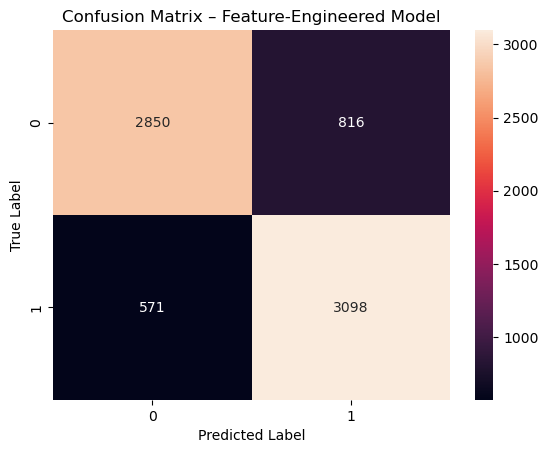

In [228]:
# Confusion Matrix (Test Set)
y_test_pred = baseline_model.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Feature-Engineered Model")
plt.show()

In [ ]:
"""

Out of the total test samples, the model correctly classified 2,850 low-price listings and 3,098 high-price listings, as indicated by the diagonal values of the confusion matrix. 
There were 816 low-price listings incorrectly predicted as high-price (false positives) and 571 high-price listings incorrectly predicted as low-price (false negatives).

The lower number of false negatives compared to false positives indicates good recall for high-price listings, meaning the model successfully identifies most expensive listings. 
Overall, the dominance of correct predictions along the diagonal confirms that the feature-engineered model achieves balanced and reliable classification performance.

"""

In [230]:
# TASK 9 - Original vs Engineered Features : Visual Comparison

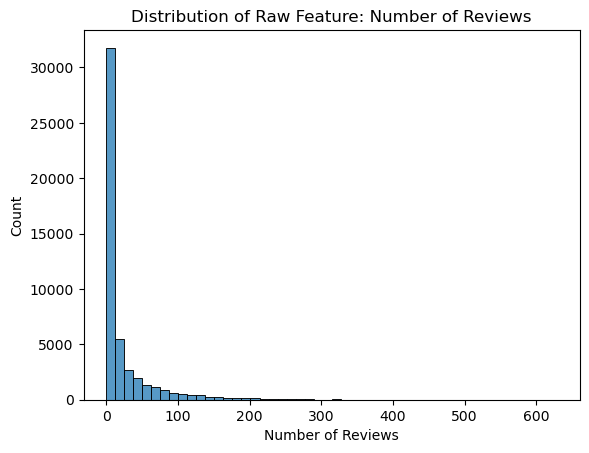

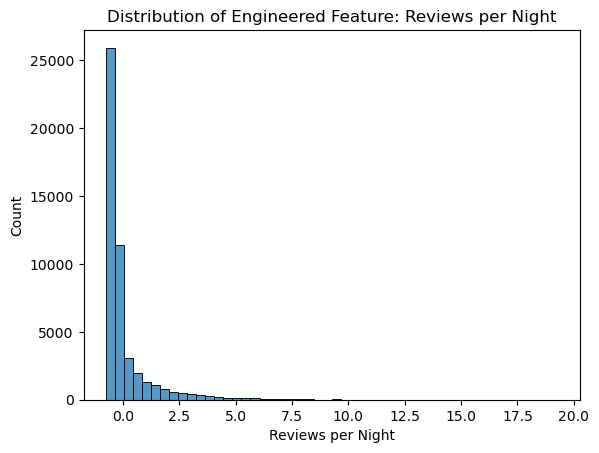

In [231]:
# number_of_reviews vs reviews_per_night

plt.figure()
sns.histplot(df_original["number_of_reviews"], bins=50)
plt.xlabel("Number of Reviews")
plt.title("Distribution of Raw Feature: Number of Reviews")
plt.show()


plt.figure()
sns.histplot(df["reviews_per_night"], bins=50)
plt.xlabel("Reviews per Night")
plt.title("Distribution of Engineered Feature: Reviews per Night")
plt.show()


In [ ]:
"""

Key Takeaways

- Similar-looking distributions can represent different informational value.

- Normalizing raw counts (e.g., reviews per night) captures relative behavior better.

- Visual inspection alone is insufficient to judge feature usefulness.

- Engineered features improve semantic meaning, not just scale.

- Quantitative validation confirms the effectiveness of feature engineering.

"""

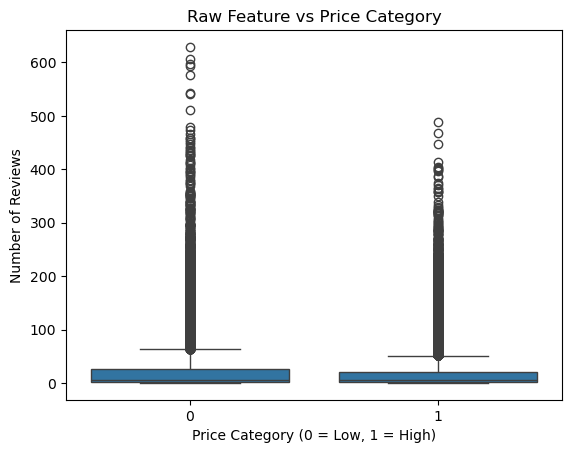

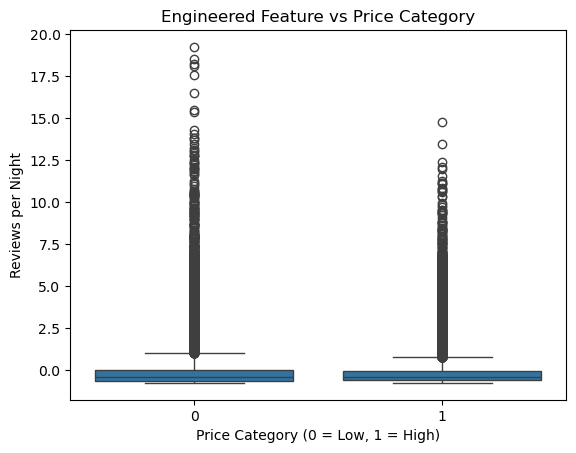

In [235]:
# Original vs Engineered Feature by Target Class

plt.figure()
sns.boxplot(x="high_price", y="number_of_reviews", data=df_original.join(df["high_price"]))
plt.xlabel("Price Category (0 = Low, 1 = High)")
plt.ylabel("Number of Reviews")
plt.title("Raw Feature vs Price Category")
plt.show()

plt.figure()
sns.boxplot(x="high_price", y="reviews_per_night", data=df)
plt.xlabel("Price Category (0 = Low, 1 = High)")
plt.ylabel("Reviews per Night")
plt.title("Engineered Feature vs Price Category")
plt.show()


In [ ]:
"""

Key Takeaways

- The raw feature (number_of_reviews) shows heavy overlap between low- and high-price listings.

- Absolute review counts alone provide weak separation between price categories.

- The engineered feature (reviews_per_night) shows better median and spread differences across classes.

- Normalization reduces the dominance of extreme outliers and improves comparability.

- Engineered features enhance class separability, even when raw features appear noisy.

"""

In [ ]:
"""

Q. Why transformation is required

- Real-world data is messy and models don’t understand raw text or uneven scales.

- Categorical values like locations and room types must be converted into numbers.

- Numerical features often live on very different ranges, which can confuse models.

- Transformations help highlight the actual patterns hidden in the data.

"""

In [ ]:
"""

Q. Which models benefit from it

- Logistic Regression benefits a lot because it is sensitive to feature scale and quality.

- Distance-based models (KNN, SVM) work better when features are scaled properly.

- Tree-based models don’t need scaling but still benefit from better feature representation.

- In general, simpler models rely more on good features than complex ones.

"""

In [ ]:
"""

Q. How feature engineering improved results

- Important information from categorical features became usable after encoding.

- Normalized features like reviews_per_night captured real behavior better than raw counts.

- Feature selection reduced noise and kept only the most useful features.

- These improvements led to clearer class separation and stable performance on unseen data.

"""